In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# general scalar projection function for normlization of vectors/wavefunctions
def project(psi1, psi2, x_vec):
    return np.trapz(np.conj(psi1)*psi2, x=x_vec)
def normalize(psi, x_vec):
    return psi/np.sqrt(project(psi, psi, x_vec))




# traverse through all files in the given filepath array and plot the mean data
def plot_mean_data(filenames, title="DemoTitle", labelname="DemoLabel", normalize_data=False, scale_data = False):
    no_of_files = len(filenames)
    
    # Calculate mean of the x and y data from all files
    mean_x = np.zeros_like(np.loadtxt(filenames[0])[:, 0])
    mean_y = np.zeros_like(np.loadtxt(filenames[0])[:, 1])

    for filename in filenames:
        data = np.loadtxt(filename)
        x = data[:, 0]
        y = data[:, 1]
        
        mean_x += x
        mean_y += y
            
    # Average the accumulated values
    mean_x /= no_of_files 
    mean_y /= no_of_files
    
    
    # normalize the mean_y data
    if normalize_data:
        # Normalize mean_y with respect to mean_x
        mean_y = normalize(mean_y, mean_x)
        
        
    # scale the mean_y data 
    if scale_data:
        max_y = np.max(mean_y)
        mean_y = mean_y//max_y
        
    

    # Plot the mean data
    # plt.figure(figsize=(10, 6))
    plt.plot(mean_x, mean_y, linestyle='-', label=labelname)
    # Add labels and title  
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (a.u.)')
    plt.title(title)
    plt.grid(True)
    plt.legend()

In [16]:
""" filenames_air = [
    "scg_raw_data/2000mwairvsBK7/air2000mw1.txt",
    "scg_raw_data/2000mwairvsBK7/air2000mw2.txt",
    "scg_raw_data/2000mwairvsBK7/air2000mw3.txt",  
    "scg_raw_data/2000mwairvsBK7/air2000mw4.txt",
    "scg_raw_data/2000mwairvsBK7/air2000mw5.txt",
    "scg_raw_data/2000mwairvsBK7/air2000mw6.txt",]

filenames_bk7 = [
    "scg_raw_data/2000mwairvsBK7/bk72000mw7.txt",
    "scg_raw_data/2000mwairvsBK7/bk72000mw8.txt",
    "scg_raw_data/2000mwairvsBK7/bk72000mw9.txt",  
    "scg_raw_data/2000mwairvsBK7/bk72000mw10.txt",
    "scg_raw_data/2000mwairvsBK7/bk72000mw11.txt",
    "scg_raw_data/2000mwairvsBK7/bk72000mw12.txt",]

plt.figure(figsize=(10, 6))
plot_mean_data(filenames_air, title="Comparison of Air and BK7 at 2000mW", labelname="Air")
plot_mean_data(filenames_bk7, title="Comparison of Air and BK7 at 2000mW", labelname="BK7")
# Add labels and title  
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
# plt.yscale('log')
plt.grid(True)
plt.legend() """

' filenames_air = [\n    "scg_raw_data/2000mwairvsBK7/air2000mw1.txt",\n    "scg_raw_data/2000mwairvsBK7/air2000mw2.txt",\n    "scg_raw_data/2000mwairvsBK7/air2000mw3.txt",  \n    "scg_raw_data/2000mwairvsBK7/air2000mw4.txt",\n    "scg_raw_data/2000mwairvsBK7/air2000mw5.txt",\n    "scg_raw_data/2000mwairvsBK7/air2000mw6.txt",]\n\nfilenames_bk7 = [\n    "scg_raw_data/2000mwairvsBK7/bk72000mw7.txt",\n    "scg_raw_data/2000mwairvsBK7/bk72000mw8.txt",\n    "scg_raw_data/2000mwairvsBK7/bk72000mw9.txt",  \n    "scg_raw_data/2000mwairvsBK7/bk72000mw10.txt",\n    "scg_raw_data/2000mwairvsBK7/bk72000mw11.txt",\n    "scg_raw_data/2000mwairvsBK7/bk72000mw12.txt",]\n\nplt.figure(figsize=(10, 6))\nplot_mean_data(filenames_air, title="Comparison of Air and BK7 at 2000mW", labelname="Air")\nplot_mean_data(filenames_bk7, title="Comparison of Air and BK7 at 2000mW", labelname="BK7")\n# Add labels and title  \nplt.xlabel(\'Wavelength (nm)\')\nplt.ylabel(\'Intensity (a.u.)\')\n# plt.yscale(\'log\')\nplt.

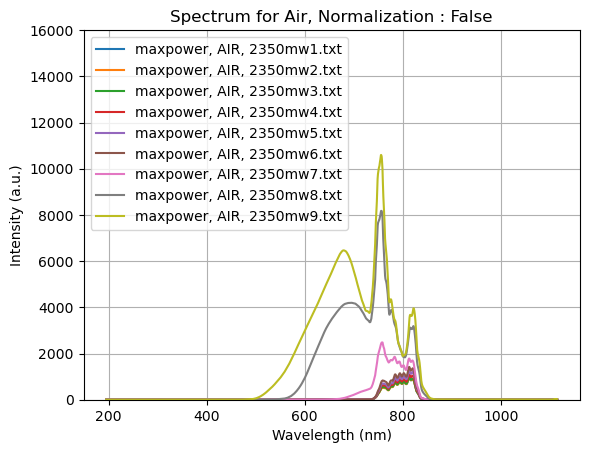

In [17]:
# AIR spectrum at 2350mW plots, further analysis breakdown in simplenote: http://simp.ly/p/jz2wrg

# for the polised data, we select the appropriate files for the mean data
# plotting all of them together to select the best ones for mean

# filenames_air = [Path(f"scg_raw_data/2000mwairvsBK7/air2000mw{i}.txt") for i in range(1, 7)]
filepath = Path(r"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs BK7\maxpower, AIR, 2350mw1.txt")

filenames_air = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs BK7\maxpower, AIR, 2350mw{i}.txt") for i in range(1, 10)]


# plt.figure(figsize=(20, 14))

normalization = False
for filename in filenames_air:
    plot_mean_data([filename], title=f"Spectrum for Air, Normalization : {normalization}", labelname=f"{filename.name}", normalize_data=normalization)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.ylim([0, 1.6e4])
plt.grid(True)  
plt.legend()



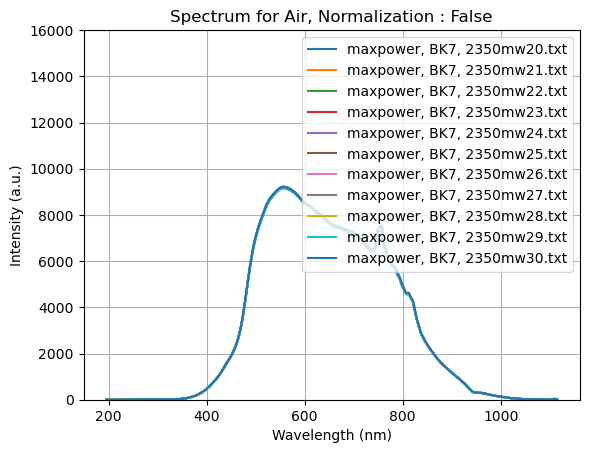

In [18]:
# BK7 spectrum at 2350mW plots

# filepath = Path(r"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs BK7\maxpower, AIR, 2350mw1.txt")

filenames_air = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs BK7\maxpower, BK7, 2350mw{i}.txt") for i in range(20, 31)]


# plt.figure(figsize=(20, 14))

normalization = False
for filename in filenames_air:
    plot_mean_data([filename], title=f"Spectrum for Air, Normalization : {normalization}", labelname=f"{filename.name}", normalize_data=normalization)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.ylim([0, 1.6e4])
# plt.yscale('log')
plt.grid(True)  
plt.legend()


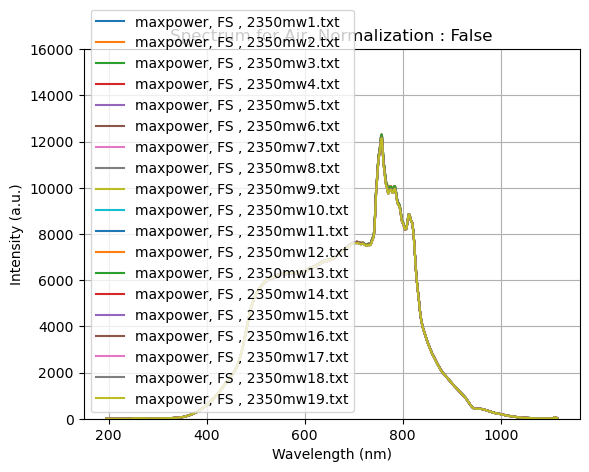

In [19]:
# FS spectra

# filepath = Path(r"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs FS\maxpower, FS, 2350mw1.txt")

filenames_air = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs FS\maxpower, FS , 2350mw{i}.txt") for i in range(1, 20)]


# plt.figure(figsize=(20, 14))

normalization = False
for filename in filenames_air:
    plot_mean_data([filename], title=f"Spectrum for Air, Normalization : {normalization}", labelname=f"{filename.name}", normalize_data=normalization)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.ylim([0, 1.6e4])
# plt.yscale('log')
plt.grid(True)  
plt.legend()

C:\Users\soumy\AppData\Local\Temp\ipykernel_14876\3810394172.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(np.conj(psi1)*psi2, x=x_vec)


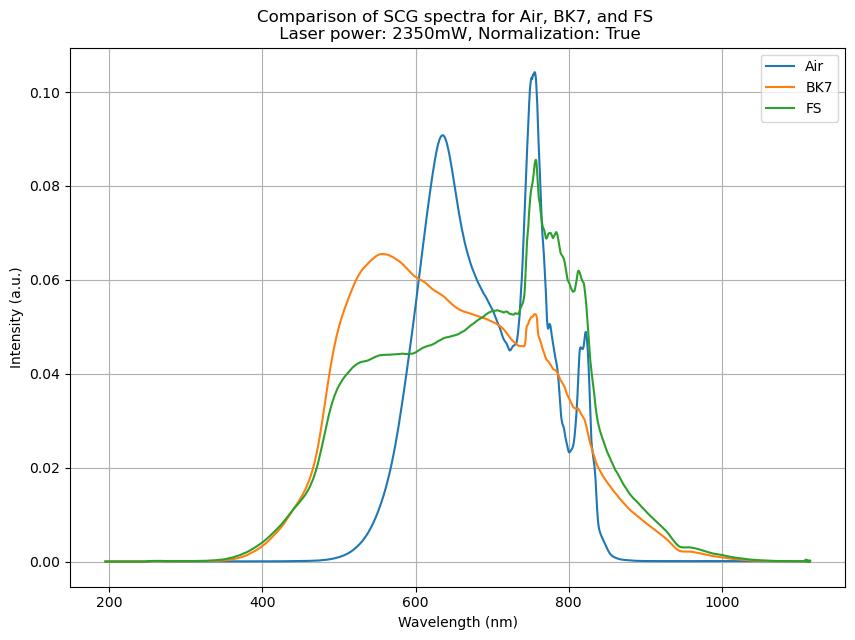

In [20]:
# mean data for the different materials, plotting only when max SPM is acheived

maxbroadening_air = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs BK7\maxpower, AIR, 2350mw{i}.txt") for i in range(14, 35)]
maxbroadening_bk7 = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs BK7\maxpower, BK7, 2350mw{i}.txt") for i in range(11, 35)]
maxbroadening_fs = [Path(rf"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\SCG-data-cleaned\air vs FS\maxpower, FS , 2350mw{i}.txt") for i in range(1, 20)]

plt.figure(figsize=(10, 7))
plot_mean_data(maxbroadening_air, title="", labelname="Air", normalize_data=True)
plot_mean_data(maxbroadening_bk7, title="", labelname="BK7", normalize_data=True)
plot_mean_data(maxbroadening_fs, title="", labelname="FS", normalize_data=True)
plt.xlabel('Wavelength (nm)')
plt.title('Comparison of SCG spectra for Air, BK7, and FS \n Laser power: 2350mW, Normalization: True')
plt.ylabel('Intensity (a.u.)')  
plt.legend()
# plt.yscale('log')

# for removal of the noise, we consider only y-scale values above 0.0001


(0.0, 20000.0)

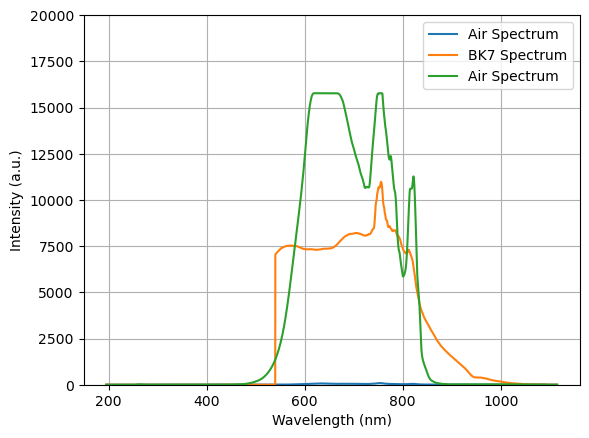

In [21]:
file = Path(r"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\scg-data\Auxiliary\air spectrum1.txt")
file2 =  Path(r"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\scg-data\Auxiliary\air spectrum16.txt")
file3 = Path(r"C:\Users\soumy\OneDrive\Desktop\ARL\SCG\scg-data\Auxiliary\BK7 ultrabroadband1.txt")
plot_mean_data([file], title="", labelname="Air Spectrum", normalize_data=False)
plot_mean_data([file3], title="", labelname="BK7 Spectrum", normalize_data=False)
plot_mean_data([file2], title="", labelname="Air Spectrum", normalize_data=False)

plt.ylim([0, 20000])